In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import pickle as pkl
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
fontsize = 12

## Lenti Layer Prob supp plot

In [7]:
hepg2_df = pd.read_csv('../lentiMPRA/results/NT_layer_prob_HepG2.csv')
k562_df = pd.read_csv('../lentiMPRA/results/NT_layer_prob_K562.csv')

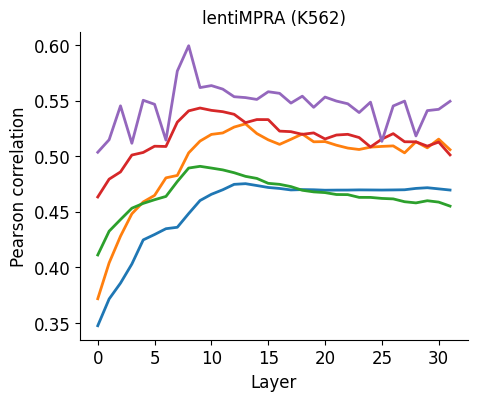

In [30]:
fontsize=12
results = k562_df
fig, ax = plt.subplots(figsize=(5,4))
x = np.array(results['Layer'])
#plt.plot(x, results['CLS-Linear'], linewidth=2)
plt.plot(x, results['CLS-Ridge'], linewidth=2)
plt.plot(x, results['CLS-MLP'], linewidth=2)

#plt.plot(x, results['Mean-embed-Linear'], linewidth=2)
plt.plot(x, results['Mean-embed-Ridge'], linewidth=2)
plt.plot(x, results['Mean-embed-MLP'], linewidth=2)

plt.plot(x, results['CNN'], linewidth=2)



legend_name = ['NT-CLS  (Ridge)',
               'NT-CLS  (MLP)',
               'NT-Mean (Ridge)',
               'NT-Mean (MLP)',
               'NT-Embedding (CNN)',
              ]

#plt.legend(legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Layer', fontsize=fontsize)
plt.ylabel("Pearson correlation", fontsize=fontsize)
plt.title('lentiMPRA (K562)', fontsize=fontsize)
fig.savefig('./supp_lenti_k562.svg', bbox_inches='tight')

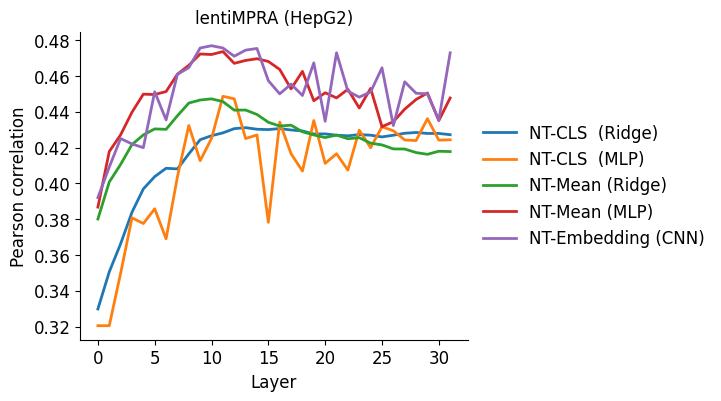

In [29]:
fontsize=12
results = hepg2_df
fig, ax = plt.subplots(figsize=(5,4))
x = np.array(results['Layer'])
#plt.plot(x, results['CLS-Linear'], linewidth=2)
plt.plot(x, results['CLS-Ridge'], linewidth=2)
plt.plot(x, results['CLS-MLP'], linewidth=2)

#plt.plot(x, results['Mean-embed-Linear'], linewidth=2)
plt.plot(x, results['Mean-embed-Ridge'], linewidth=2)
plt.plot(x, results['Mean-embed-MLP'], linewidth=2)

plt.plot(x, results['CNN'], linewidth=2)



legend_name = [
               'NT-CLS  (Ridge)',
               'NT-CLS  (MLP)',
               'NT-Mean (Ridge)',
               'NT-Mean (MLP)',
               'NT-Embedding (CNN)',
              ]

plt.legend(legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Layer', fontsize=fontsize)
plt.ylabel("Pearson correlation", fontsize=fontsize)
plt.title('lentiMPRA (HepG2)', fontsize=fontsize)
fig.savefig('./supp_lenti_hepg2.svg', bbox_inches='tight')

## Lenti downstream model size plot

In [2]:
base_df = pd.read_csv('../lentiMPRA/results/LLM_regression.csv')
cnn_df = pd.read_csv('../lentiMPRA/results/LLM_CNN.csv')
perf_df = pd.concat((cnn_df,base_df))
base_df = pd.read_csv('../lentiMPRA/results/LLM_regression.csv')
cnn_df = pd.read_csv('../lentiMPRA/results/LLM_CNN.csv')
perf_df = pd.concat((cnn_df,base_df))
nt1_df = pd.read_csv('../lentiMPRA/results/NT_layer_prob_HepG2.csv')
nt1_df = nt1_df[nt1_df['Layer']==31]
nt1_df['Cell Type'] = 'HepG2'
nt2_df = pd.read_csv('../lentiMPRA/results/NT_layer_prob_K562.csv')
nt2_df = nt2_df[nt2_df['Layer']==31]
nt2_df['Cell Type'] = 'K562'
nt_df = pd.concat((nt1_df,nt2_df))
nt_df['LLM'] = ['NT','NT']
nt_df = nt_df.drop('Layer',axis=1)
nt_df = pd.melt(nt_df,['LLM','Cell Type'],var_name='Model',value_name='Performance')
perf_df = pd.concat((perf_df,nt_df))
search_df = pd.read_csv('../lentiMPRA/results/NT_search.csv')
perf_df = pd.concat((perf_df,search_df))

In [3]:
filter = perf_df['Model'].str.contains('Linear')
perf_df = perf_df[~filter]

In [4]:
perf_df = perf_df.replace({'CNN1.0':'CNN','CNN2.0':'CNN2','CLS-MLP1':'CLS-MLP','Mean-embed-MLP1':'Mean-embed-MLP',
                            'rep_cnn': 'One-hot','sei': 'SEI','dnabert': 'DNABERT2','gpn': 'GPN',
                            'hyena': 'Hyena','randbert':'Random'})
perf_df['Model'] = pd.Categorical(perf_df['Model'], 
                    ["CLS-Ridge",'Mean-embed-Ridge','CLS-MLP0.5','CLS-MLP','CLS-MLP2',
                    'Mean-embed-MLP0.5','Mean-embed-MLP','Mean-embed-MLP2',
                    'CNN0.5','CNN','CNN2'])

/tmp/ipykernel_346156/1579998854.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
/tmp/ipykernel_346156/1579998854.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize,rotation = 45,ha='right');
/tmp/ipykernel_346156/1579998854.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
/tmp/ipykernel_346156/1579998854.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize,rotation = 45,ha='right');
/tmp/ipykernel_346156/1579998854.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
/tmp/ipykernel_346156/1579998854.py:14: UserWarning: FixedForma

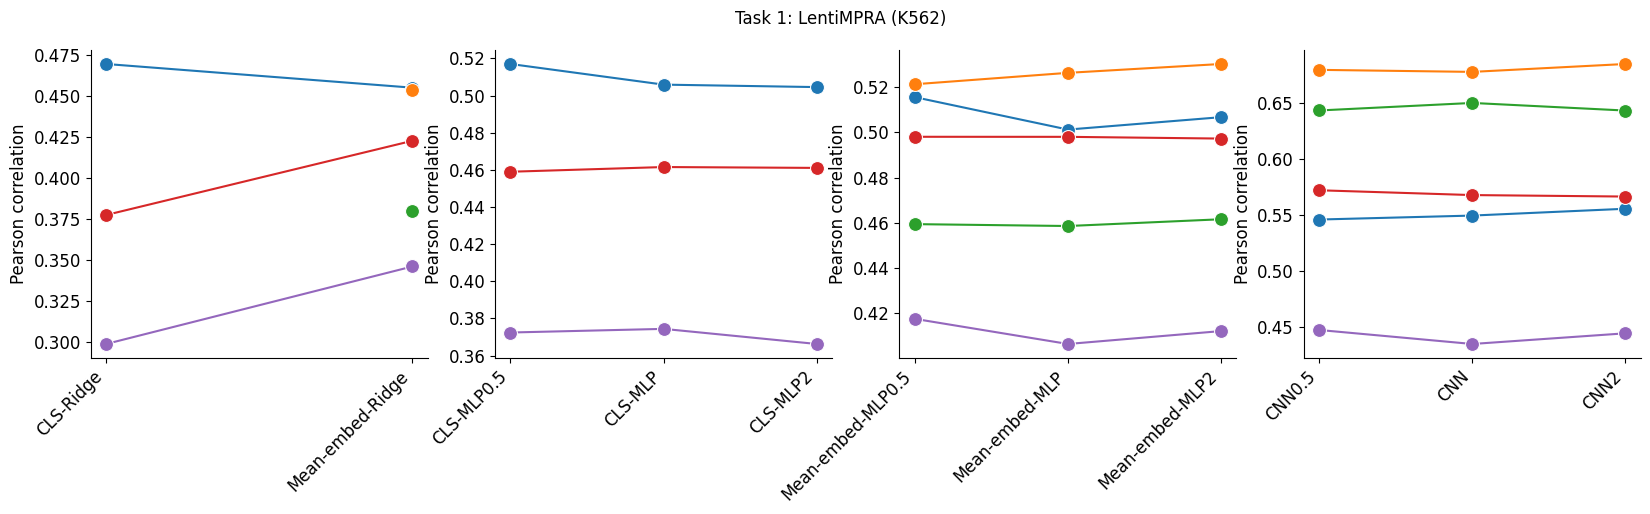

In [38]:
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 10   
fig,axs = plt.subplots(1,4,figsize=(20,4))
hue_order = ['NT','GPN','Hyena','DNABERT2','Random']

i=0
for structure in ['Ridge','CLS-MLP','Mean-embed-MLP','CNN']:
    ax = axs[i]
    filter = perf_df['Model'].str.contains(structure)
    sub_df = perf_df[filter]
    sub_df = sub_df[sub_df['Cell Type']=='K562']
    fig = sns.lineplot(sub_df,x='Model',y='Performance',hue='LLM',marker='o',hue_order = hue_order,ax = ax)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize,rotation = 45,ha='right');
    ax.set_ylabel("Pearson correlation",fontsize=fontsize);
    ax.set_xlabel("",fontsize=fontsize);
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    i+=1


plt.suptitle('Task 1: LentiMPRA (K562)',fontsize=fontsize)
plt.savefig('./supp_search_k562.svg', bbox_inches='tight')


/tmp/ipykernel_346156/2991148089.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
/tmp/ipykernel_346156/2991148089.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize,rotation = 45,ha='right');
/tmp/ipykernel_346156/2991148089.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
/tmp/ipykernel_346156/2991148089.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize,rotation = 45,ha='right');
/tmp/ipykernel_346156/2991148089.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
/tmp/ipykernel_346156/2991148089.py:14: UserWarning: FixedForma

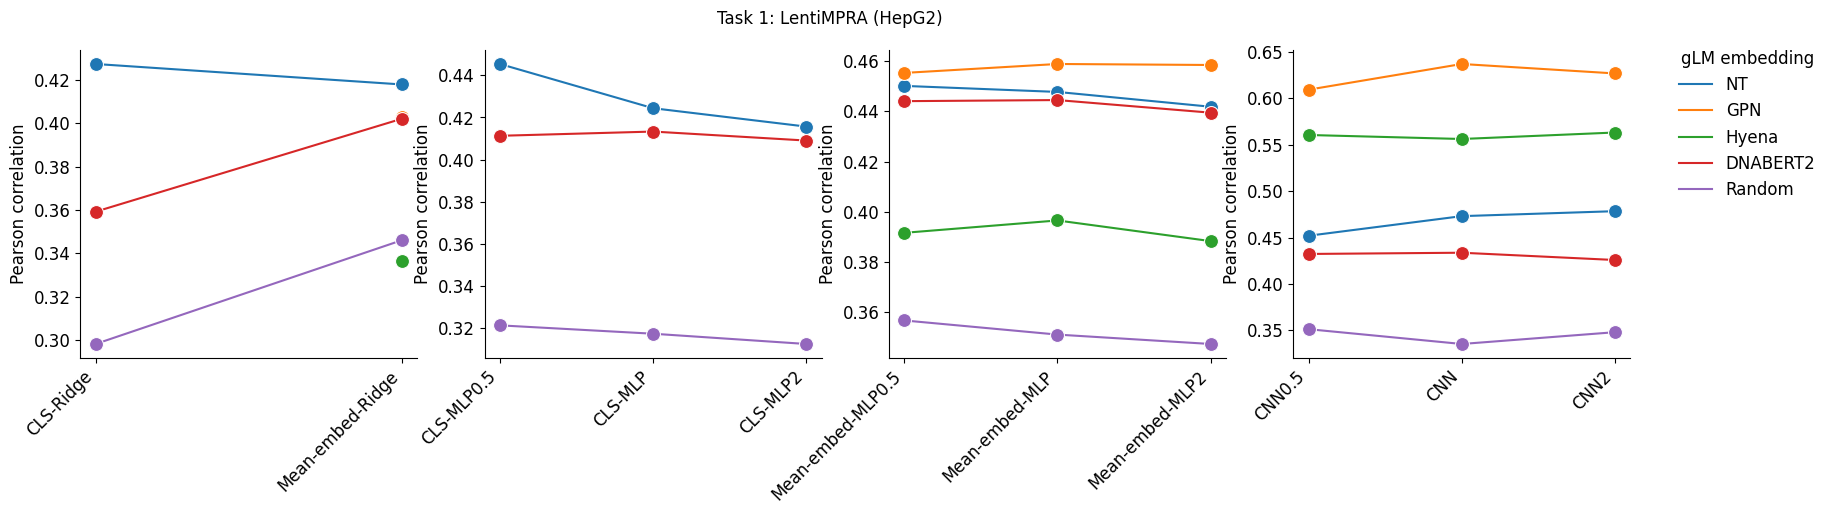

In [42]:
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 10   
fig,axs = plt.subplots(1,4,figsize=(20,4))
hue_order = ['NT','GPN','Hyena','DNABERT2','Random']

i=0
for structure in ['Ridge','CLS-MLP','Mean-embed-MLP','CNN']:
    ax = axs[i]
    filter = perf_df['Model'].str.contains(structure)
    sub_df = perf_df[filter]
    sub_df = sub_df[sub_df['Cell Type']=='HepG2']
    fig = sns.lineplot(sub_df,x='Model',y='Performance',hue='LLM',marker='o',hue_order = hue_order,ax = ax)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=fontsize);
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=fontsize,rotation = 45,ha='right');
    ax.set_ylabel("Pearson correlation",fontsize=fontsize);
    ax.set_xlabel("",fontsize=fontsize);
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.get_legend().remove()
    i+=1

legend = plt.legend(title='gLM embedding',frameon=False,fontsize = fontsize,bbox_to_anchor=(1.1, 1.05))
legend.get_title().set_fontsize(fontsize)
plt.suptitle('Task 1: LentiMPRA (HepG2)',fontsize=fontsize)
plt.savefig('./supp_search_k562.svg', bbox_inches='tight')


## Chip/Clip control plot

In [2]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/chip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)
total_df = total_df.replace({'NT 32 CNN': 'NT-embedding (CNN)'})
total_df = total_df.replace({'sei': 'SEI'})
total_df = total_df.replace({'CNN': 'One-hot'})

group_df = total_df.groupby(['Model','TF'])
mean_df = group_df.mean()
std_df = group_df.std()
plot_df = mean_df.merge(std_df,on=['Model','TF'])
plot_df = plot_df[['AUROC_x','AUROC_y']]
plot_df = plot_df.reset_index(level=1)
plot_df['AUROC_y'] = plot_df['AUROC_y'].fillna(0)
pal = sns.color_palette()
pal = pal.as_hex()
exp = total_df['TF'].unique()
pal_dic = {exp[i]:pal[i]for i in range(len(exp))}

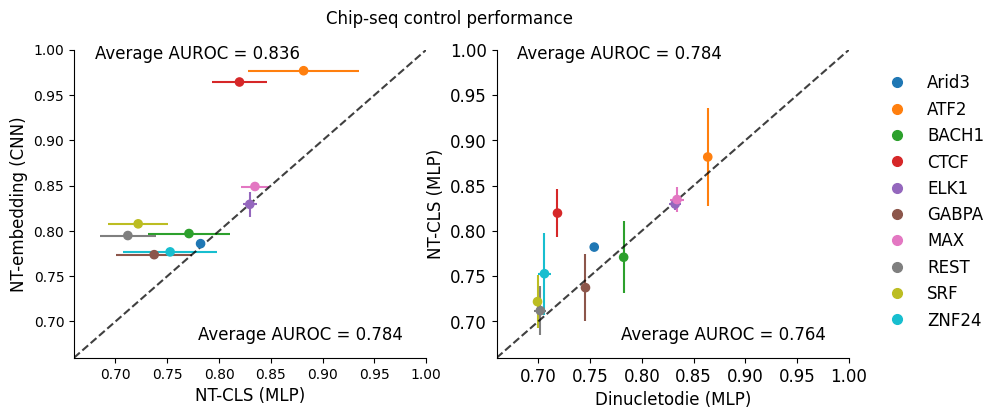

In [9]:
plot_df = plot_df.rename({'NT32CLS MLP':'NT-CLS (MLP)'})
fig,axs = plt.subplots(1,2,figsize =(10,4))
plt.setp(axs, xlim=(0.66,1), ylim=(0.66,1))
compare_pairs = [('NT-embedding (CNN)','NT-CLS (MLP)'),('NT-CLS (MLP)','Dinucletodie (MLP)')]
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
for i in range(2):
    pair = compare_pairs[i]
    y_model = pair[0]
    x_model = pair[1]
    ax = axs[i]
    ax.errorbar(x=plot_df.loc[x_model]['AUROC_x'],
                    y=plot_df.loc[y_model]['AUROC_x'],
                    xerr=plot_df.loc[x_model]['AUROC_y'],
                    yerr=plot_df.loc[y_model]['AUROC_y'],
                    marker = '', ls = '',
                    zorder =0, ecolor = plot_df.loc[y_model]['TF'].map(pal_dic))
    ax.scatter(x=plot_df.loc[x_model]['AUROC_x'],y=plot_df.loc[y_model]['AUROC_x'],c=plot_df.loc[y_model]['TF'].map(pal_dic),s=35)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    average = plot_df.loc[y_model]['AUROC_x'].mean()
    base_average = plot_df.loc[x_model]['AUROC_x'].mean()
    ax.text(lims[0]+0.02,lims[1]-0.01,"Average AUROC = %.3f" % (average),fontsize=fontsize)
    ax.text(lims[0]+0.12,lims[0]+0.02,"Average AUROC = %.3f" % (base_average),fontsize=fontsize)
    # ax.text(lims[1]-0.5,lims[0],"Average Pearson's r = 0.247" )
    ax.set_ylabel(y_model,fontsize = fontsize)
    ax.set_xlabel(x_model,fontsize = fontsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.suptitle('Chip-seq control performance',fontsize=fontsize)
legend_elements =[Line2D([0],[0],linestyle='', marker='o', 
                    label=exp[i],
                    markerfacecolor=pal[i],
                    markeredgecolor = pal[i], 
                    markersize=7) for i in  range(len(exp))]
fig.legend(handles = legend_elements, fontsize=fontsize, frameon=False, loc='center right',bbox_to_anchor=(1.05,0.5))
fig.savefig('./supp_chip.svg')

In [10]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/eclip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)
total_df = total_df.replace({'NT 32 CNN': 'NT-embedding (CNN)'})
total_df = total_df.replace({'sei': 'SEI'})
total_df = total_df.replace({'CNN': 'One-hot'})

group_df = total_df.groupby(['Model','TF'])
mean_df = group_df.mean()
std_df = group_df.std()
plot_df = mean_df.merge(std_df,on=['Model','TF'])
plot_df = plot_df[['AUROC_x','AUROC_y']]
plot_df = plot_df.reset_index(level=1)
plot_df['AUROC_y'] = plot_df['AUROC_y'].fillna(0)
pal = sns.color_palette()
pal = pal.as_hex()
exp = total_df['TF'].unique()
pal_dic = {exp[i]:pal[i]for i in range(len(exp))}

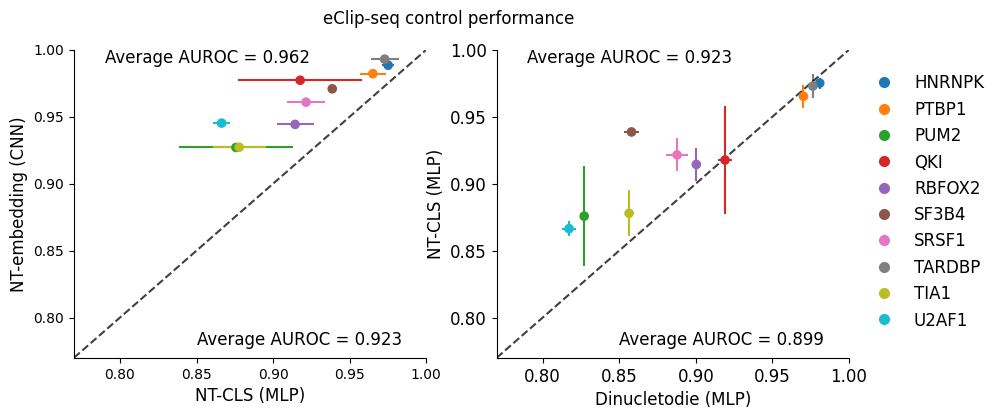

In [16]:
plot_df = plot_df.rename({'NT32CLS MLP':'NT-CLS (MLP)'})
fig,axs = plt.subplots(1,2,figsize =(10,4))
plt.setp(axs, xlim=(0.77,1), ylim=(0.77,1))
compare_pairs = [('NT-embedding (CNN)','NT-CLS (MLP)'),('NT-CLS (MLP)','Dinucletodie (MLP)')]
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
for i in range(2):
    pair = compare_pairs[i]
    y_model = pair[0]
    x_model = pair[1]
    ax = axs[i]
    ax.errorbar(x=plot_df.loc[x_model]['AUROC_x'],
                    y=plot_df.loc[y_model]['AUROC_x'],
                    xerr=plot_df.loc[x_model]['AUROC_y'],
                    yerr=plot_df.loc[y_model]['AUROC_y'],
                    marker = '', ls = '',
                    zorder =0, ecolor = plot_df.loc[y_model]['TF'].map(pal_dic))
    ax.scatter(x=plot_df.loc[x_model]['AUROC_x'],y=plot_df.loc[y_model]['AUROC_x'],c=plot_df.loc[y_model]['TF'].map(pal_dic),s=35)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    average = plot_df.loc[y_model]['AUROC_x'].mean()
    base_average = plot_df.loc[x_model]['AUROC_x'].mean()
    ax.text(lims[0]+0.02,lims[1]-0.01,"Average AUROC = %.3f" % (average),fontsize=fontsize)
    ax.text(lims[0]+0.08,lims[0]+0.01,"Average AUROC = %.3f" % (base_average),fontsize=fontsize)
    # ax.text(lims[1]-0.5,lims[0],"Average Pearson's r = 0.247" )
    ax.set_ylabel(y_model,fontsize = fontsize)
    ax.set_xlabel(x_model,fontsize = fontsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.suptitle('eClip-seq control performance',fontsize=fontsize)
legend_elements =[Line2D([0],[0],linestyle='', marker='o', 
                    label=exp[i],
                    markerfacecolor=pal[i],
                    markeredgecolor = pal[i], 
                    markersize=7) for i in  range(len(exp))]
fig.legend(handles = legend_elements, fontsize=fontsize, frameon=False, loc='center right',bbox_to_anchor=(1.05,0.5))
fig.savefig('./supp_clip.svg')

## Sub-sample exp

In [2]:
import pickle as pkl
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
df1 = pd.DataFrame()
for file in glob.glob('../RNAenlong/result/*.pkl'):
    with open(file, "rb") as input_file:
        df = pkl.load(input_file)
        df1 = pd.concat((df1,df),ignore_index=True)
x = np.unique(df1['Data Ratio'])

models = np.unique(df1['Input Data'])

results = {}
results2 = {}
for name in models:
    entry = df1[df1['Input Data'] == name]
        
    mean = []
    std = []
    for val in x:
        tmp_df = entry[entry['Data Ratio'] == val]
        tmp = np.array(tmp_df['Prediction Pearson R'])
        mean.append(np.mean(tmp))
        std.append(np.std(tmp))
    results[name] = np.array(mean)
    results2[name] = np.array(std)/np.sqrt(5)
    
results.keys()  

dict_keys(['2B5_1000G_embed', '2B5_1000G_embed_l10', 'dnabert_embed', 'gpn_human_embed', 'hyena_embed', 'insert_dataset', 'rbp_embed', 'sei_embed'])

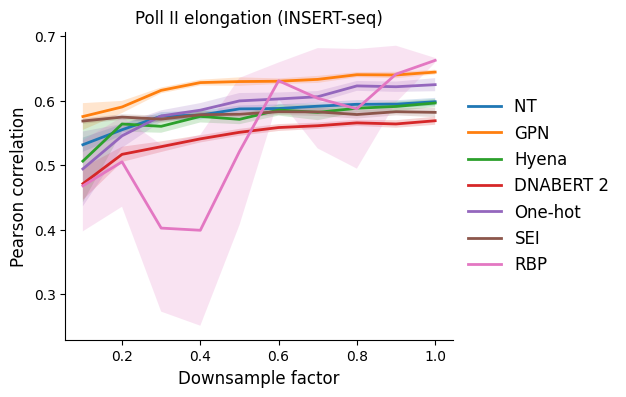

In [5]:
fontsize=12

fig, ax = plt.subplots(figsize=(5,4))

l1, = plt.plot(x, results['2B5_1000G_embed_l10'], linewidth=2)
plt.fill_between(x, results['2B5_1000G_embed_l10']-results2['2B5_1000G_embed_l10'], results['2B5_1000G_embed_l10']+results2['2B5_1000G_embed_l10'], alpha=0.2)

l2, =plt.plot(x, results['gpn_human_embed'], linewidth=2)
plt.fill_between(x, results['gpn_human_embed']-results2['gpn_human_embed'], results['gpn_human_embed']+results2['gpn_human_embed'], alpha=0.2)

l3, =plt.plot(x, results['hyena_embed'], linewidth=2)
plt.fill_between(x, results['hyena_embed']-results2['hyena_embed'], results['hyena_embed']+results2['hyena_embed'], alpha=0.2)

l4, =plt.plot(x, results['dnabert_embed'], linewidth=2)
plt.fill_between(x, results['dnabert_embed']-results2['dnabert_embed'], results['dnabert_embed']+results2['dnabert_embed'], alpha=0.2)

l5, =plt.plot(x, results['insert_dataset'], linewidth=2)
plt.fill_between(x, results['insert_dataset']-results2['insert_dataset'], results['insert_dataset']+results2['insert_dataset'], alpha=0.2)

l6, =plt.plot(x, results['sei_embed'], linewidth=2)
plt.fill_between(x, results['sei_embed']-results2['sei_embed'], results['sei_embed']+results2['sei_embed'], alpha=0.2)

l7, =plt.plot(x, results['rbp_embed'], linewidth=2)
plt.fill_between(x, results['rbp_embed']-results2['rbp_embed'], results['rbp_embed']+results2['rbp_embed'], alpha=0.2)



#plt.plot([x[0],x[-1]], [0.7725, 0.7725],'--', linewidth=2)
#plt.text(33,0.7725,'Onehot Residual')


legend_name = [
               'NT ',
               'GPN',
               'Hyena',
               'DNABERT 2',
               'One-hot',
               'SEI',
               'RBP',
              ]

plt.legend([l1,l2,l3,l4,l5,l6,l7],legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.yticks([0.5, 0.55, 0.6, 0.65], fontsize=fontsize )
# plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=fontsize)
#plt.setp(ax.get_yticklabels(), fontsize=fontsize)
#plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Downsample factor', fontsize=fontsize)
plt.ylabel("Pearson correlation", fontsize=fontsize)
plt.title('Poll II elongation (INSERT-seq)', fontsize=fontsize)
fig.savefig('insert_subsample.svg')

## MT-Splice

In [5]:
df1 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df1 = pd.concat((df1,mean_df),ignore_index=True)
df1['Downsample factor'] = '1.0'

df5 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/0.5/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df5 = pd.concat((df5,mean_df),ignore_index=True)
df5['Downsample factor'] = '0.5'

df25 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/0.25/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df25 = pd.concat((df25,mean_df),ignore_index=True)
df25['Downsample factor'] = '0.25'
total_df = pd.concat((df1,df5,df25),ignore_index=True)
total_df.rename(columns={0:'Spearman rho'}, inplace=True)

In [6]:
x = np.unique(total_df['Downsample factor'])


In [7]:
models = np.unique(total_df['Model'])
results = {}
results2 = {}
for name in models:
    entry = total_df[total_df['Model'] == name]
        
    mean = []
    std = []
    for val in x:
        tmp_df = entry[entry['Downsample factor'] == val]
        tmp = np.array(tmp_df['Spearman rho'])
        mean.append(np.mean(tmp))
        std.append(np.std(tmp))
    results[name] = np.array(mean)
    results2[name] = np.array(std)/np.sqrt(5)
    
results.keys()



dict_keys(['CNN', 'DNABERT', 'GPN', 'Hyena', 'NT10_CNN', 'NT32_CNN', 'rbp', 'sei'])

In [8]:
results

{'CNN': array([0.25232209, 0.25078883, 0.30426482]),
 'DNABERT': array([0.1627446 , 0.17472794, 0.21126021]),
 'GPN': array([0.2433151 , 0.26358309, 0.28582111]),
 'Hyena': array([0.23083626, 0.24753553, 0.27010179]),
 'NT10_CNN': array([0.23324858, 0.25927453, 0.27449989]),
 'NT32_CNN': array([0.22735198, 0.25732598, 0.26352414]),
 'rbp': array([0.23908765, 0.26004552, 0.2885265 ]),
 'sei': array([0.04241463, 0.12847837, 0.2207997 ])}

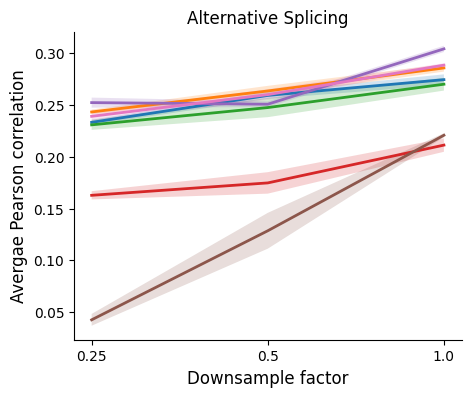

In [9]:
fontsize=12

fig, ax = plt.subplots(figsize=(5,4))

l1, =plt.plot(x, results['NT10_CNN'], linewidth=2)
plt.fill_between(x, results['NT10_CNN']-results2['NT10_CNN'], results['NT10_CNN']+results2['NT10_CNN'], alpha=0.2)

l2, =plt.plot(x, results['GPN'], linewidth=2)
plt.fill_between(x, results['GPN']-results2['GPN'], results['GPN']+results2['GPN'], alpha=0.2)

l3, =plt.plot(x, results['Hyena'], linewidth=2)
plt.fill_between(x, results['Hyena']-results2['Hyena'], results['Hyena']+results2['Hyena'], alpha=0.2)

l4, = plt.plot(x, results['DNABERT'], linewidth=2)
plt.fill_between(x, results['DNABERT']-results2['DNABERT'], results['DNABERT']+results2['DNABERT'], alpha=0.2)

l5, = plt.plot(x, results['CNN'], linewidth=2)
plt.fill_between(x, results['CNN']-results2['CNN'], results['CNN']+results2['CNN'], alpha=0.2)

l6, =plt.plot(x, results['sei'], linewidth=2)
plt.fill_between(x, results['sei']-results2['sei'], results['sei']+results2['sei'], alpha=0.2)

l7, =plt.plot(x, results['rbp'], linewidth=2)
plt.fill_between(x, results['rbp']-results2['rbp'], results['rbp']+results2['rbp'], alpha=0.2)

#plt.text(33,0.7725,'Onehot Residual')


#legend_name = ['CNN', 'DNABERT', 'GPN', 'Hyena', 'NT10_CNN', 'NT32_CNN', 'rbp', 'sei']

#plt.legend([l1,l2,l3,l4,l5,l6,l7,l8],legend_name, fontsize=fontsize, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.yticks([0.5, 0.55, 0.6, 0.65], fontsize=fontsize )
# plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=fontsize)
#plt.setp(ax.get_yticklabels(), fontsize=fontsize)
#plt.setp(ax.get_xticklabels(), fontsize=fontsize);
plt.xlabel('Downsample factor', fontsize=fontsize)
plt.ylabel("Avergae Pearson correlation", fontsize=fontsize)
plt.title('Alternative Splicing', fontsize=fontsize)
fig.savefig('AS_subsample.svg')